In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target_names[iris.target]

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


            count   mean       std  min    25%  50%  75%  max
species                                                      
setosa       50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8
versicolor   50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0
virginica    50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9


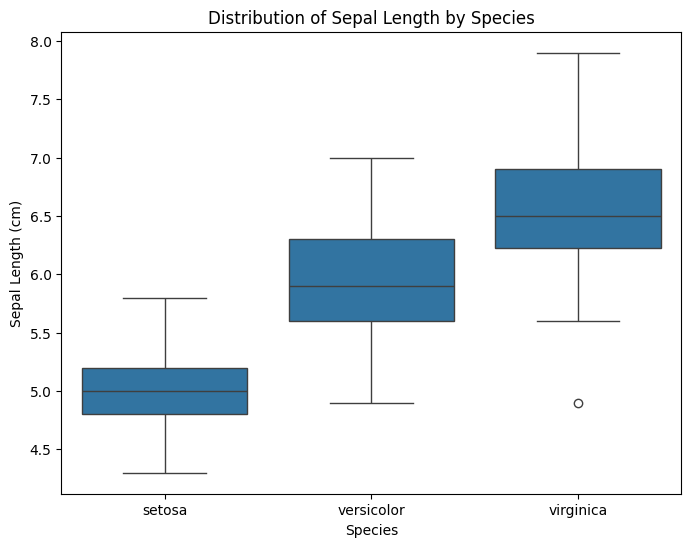

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate descriptive statistics for sepal length by species
sepal_length_stats = df.groupby('species')['sepal length (cm)'].describe()
print(sepal_length_stats)

# Create box plots to visualize sepal length distribution by species
plt.figure(figsize=(8, 6))
sns.boxplot(x='species', y='sepal length (cm)', data=df)
plt.title('Distribution of Sepal Length by Species')
plt.xlabel('Species')
plt.ylabel('Sepal Length (cm)')
plt.show()

In [ ]:
# To Calculate the correlation coefficient
correlation = df['petal length (cm)'].corr(df['petal width (cm)'])

print(f"The correlation between petal length and petal width is: {correlation:.2f}")

The correlation between petal length and petal width is: 0.96


In [ ]:
import numpy as np

# To Calculate z-scores for sepal width within each species
df['sepal_width_zscore'] = df.groupby('species')['sepal width (cm)'].transform(lambda x: (x - x.mean()) / x.std())

# To find outliers (z-score > 3 or z-score < -3)
outliers = df[(df['sepal_width_zscore'] > 3) | (df['sepal_width_zscore'] < -3)]

print(outliers)

Empty DataFrame
Columns: [sepal length (cm), sepal width (cm), petal length (cm), petal width (cm), species, sepal_width_zscore]
Index: []


In [ ]:
from scipy import stats

# to get petal length data for setosa and versicolor
setosa_petal_length = df[df['species'] == 'setosa']['petal length (cm)']
versicolor_petal_length = df[df['species'] == 'versicolor']['petal length (cm)']

# To Perform independent two-sample t-test with unequal variances
t_statistic, p_value = stats.ttest_ind(setosa_petal_length, versicolor_petal_length, equal_var=False)

print(f"T-statistic: {t_statistic:.2f}")
print(f"P-value: {p_value:.3f}")

#To interpret results
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference in mean petal length between setosa and versicolor.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in mean petal length between setosa and versicolor.")

T-statistic: -39.49
P-value: 0.000
Reject null hypothesis: There is a significant difference in mean petal length between setosa and versicolor.
